In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('vehicle.csv')
df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df.shape


(846, 19)

In [6]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [7]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


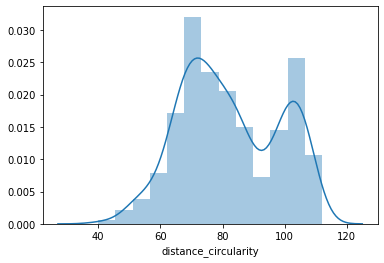

In [28]:
# For distance_circularity the minimum value is 40 and maximum is 112, but on average it is 82.11 with a variation of 15.77

sns.distplot(df['distance_circularity'])

In [30]:

print("Skewness: %f" % df['distance_circularity'].skew())
print("Kurtosis: %f" % df['distance_circularity'].kurt())

Skewness: 0.106837
Kurtosis: -0.967634


In [ ]:
# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is negative hence less data points are around the tail

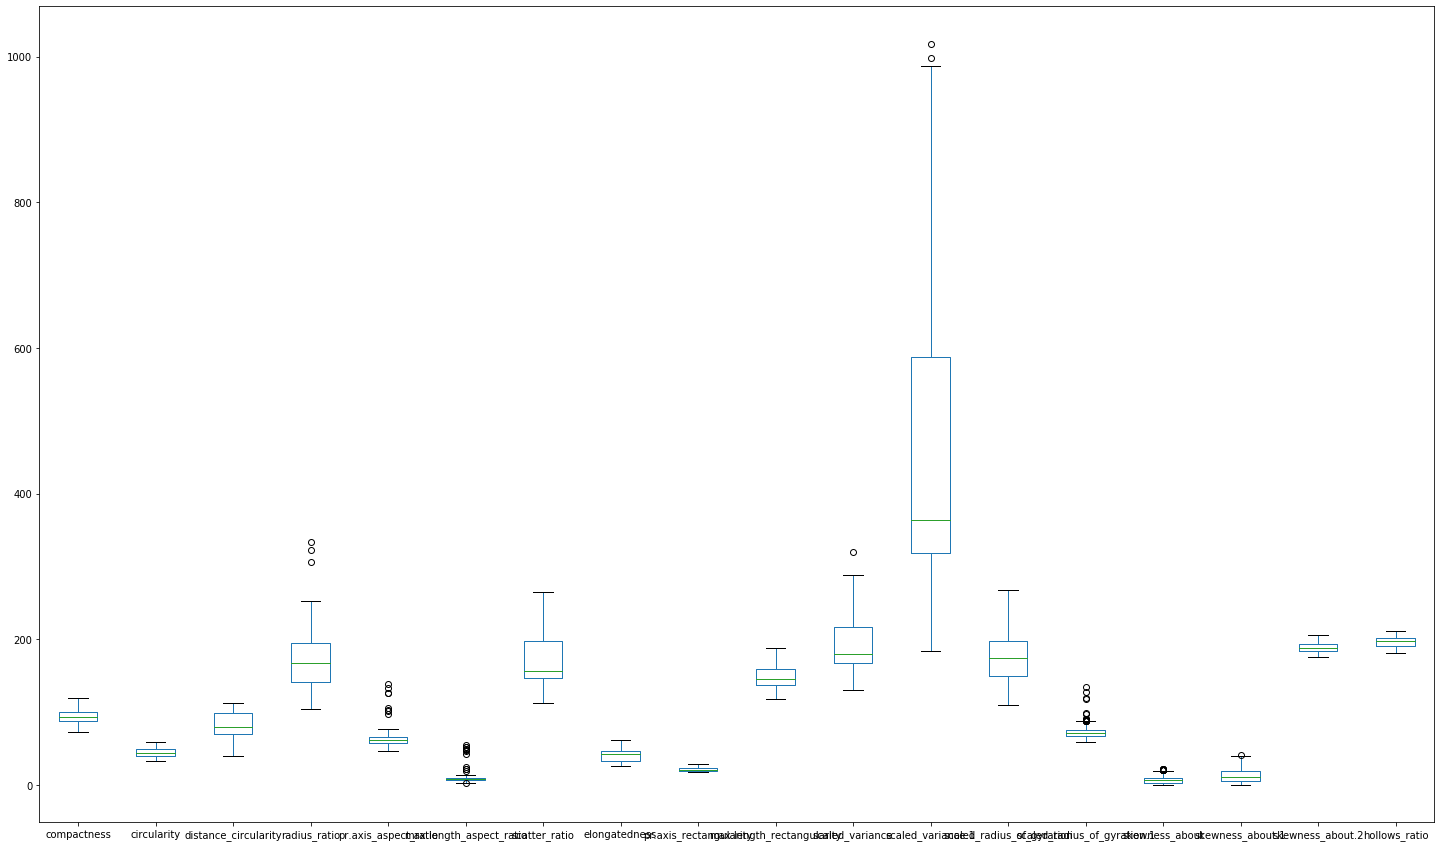

In [10]:
df.plot(kind='box', figsize=(25,15))

In [20]:
df.isnull().sum()

# this shows there are many blank values.

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [26]:
# Replacing all null values with mean of the respective columns.

df['circularity'] = df['circularity'].fillna(df['circularity'].mean())
df['distance_circularity'] = df['distance_circularity'].fillna(df['distance_circularity'].mean())
df['radius_ratio'] = df['radius_ratio'].fillna(df['radius_ratio'].mean())
df['pr.axis_aspect_ratio'] = df['pr.axis_aspect_ratio'].fillna(df['pr.axis_aspect_ratio'].mean())
df['scatter_ratio'] = df['scatter_ratio'].fillna(df['scatter_ratio'].mean())
df['elongatedness'] = df['elongatedness'].fillna(df['elongatedness'].mean())
df['pr.axis_rectangularity'] = df['pr.axis_rectangularity'].fillna(df['pr.axis_rectangularity'].mean())
df['scaled_variance'] = df['scaled_variance'].fillna(df['scaled_variance'].mean())
df['scaled_variance.1'] = df['scaled_variance.1'].fillna(df['scaled_variance.1'].mean())
df['scaled_radius_of_gyration'] = df['scaled_radius_of_gyration'].fillna(df['scaled_radius_of_gyration'].mean())
df['scaled_radius_of_gyration.1'] = df['scaled_radius_of_gyration.1'].fillna(df['scaled_radius_of_gyration.1'].mean())
df['skewness_about'] = df['skewness_about'].fillna(df['skewness_about'].mean())
df['skewness_about.1'] = df['skewness_about.1'].fillna(df['skewness_about.1'].mean())
df['skewness_about.2'] = df['skewness_about.2'].fillna(df['skewness_about.2'].mean())

df.isnull().any()

# this now confirms no columns with null/empty values.

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [21]:
#Identify outliers and replace them by median

for col_name in df.columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

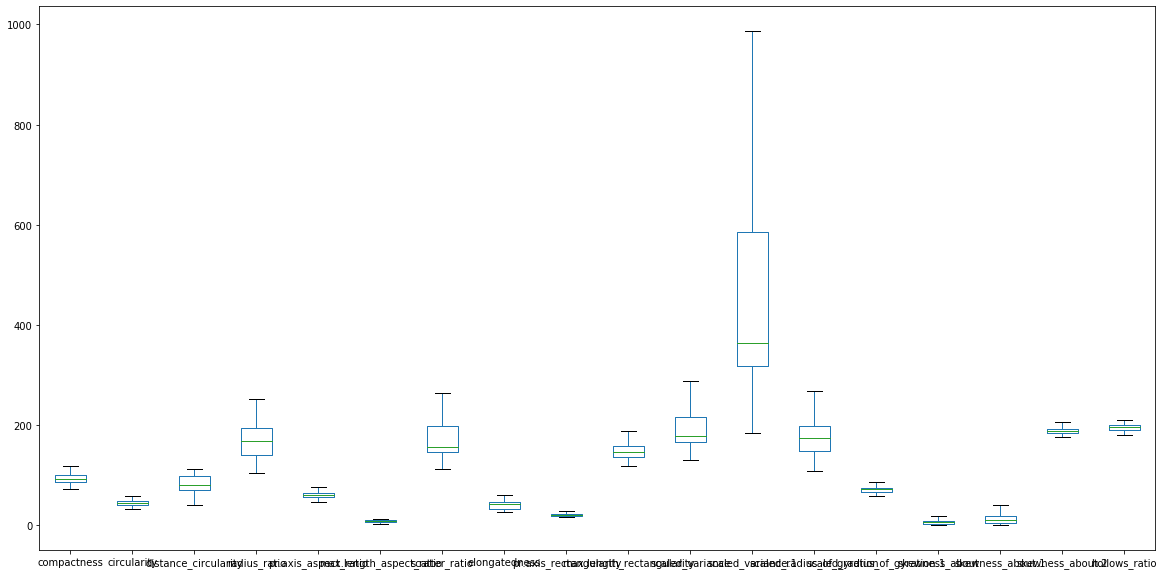

In [22]:
df.plot(kind='box', figsize=(20,10))

# As you can see that outliers have been treated as per logic.

In [ ]:
# Lets visualise some relationships between these data points, but before we do, 
# we need to scale them to same the same range of [0,1]
# In order to do so, lets define a function scale

In [31]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [34]:
df_scale = df.copy()

df_scale ['compactness'] = scale(df_scale['compactness'])
df_scale['circularity'] = scale(df_scale['circularity'])
df_scale ['distance_circularity'] = scale(df_scale['distance_circularity'])
df_scale ['radius_ratio'] = scale(df_scale['radius_ratio'])
df_scale['pr.axis_aspect_ratio'] = scale(df_scale['pr.axis_aspect_ratio'])
df_scale ['max.length_aspect_ratio'] = scale(df_scale['max.length_aspect_ratio'])
df_scale ['scatter_ratio'] = scale(df_scale['scatter_ratio'])
df_scale ['elongatedness'] = scale(df_scale['elongatedness'])
df_scale ['pr.axis_rectangularity'] = scale(df_scale['pr.axis_rectangularity'])
df_scale ['max.length_rectangularity'] = scale(df_scale['max.length_rectangularity'])
df_scale ['scaled_variance'] = scale(df_scale['scaled_variance'])
df_scale ['scaled_variance.1'] = scale(df_scale['scaled_variance.1'])
df_scale ['scaled_radius_of_gyration'] = scale(df_scale['scaled_radius_of_gyration'])
df_scale ['scaled_radius_of_gyration.1'] = scale(df_scale['scaled_radius_of_gyration.1'])
df_scale ['skewness_about'] = scale(df_scale['skewness_about'])
df_scale ['skewness_about.1'] = scale(df_scale['skewness_about.1'])
df_scale ['skewness_about.2'] = scale(df_scale['skewness_about.2'])
df_scale ['hollows_ratio'] = scale(df_scale['hollows_ratio'])

In [35]:
df_scale.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.478261,0.576923,0.597222,0.500000,0.862069,0.7,0.326797,0.457143,0.250000,0.585714,0.291139,0.242839,0.471698,0.392857,0.315789,0.400,0.366667,0.533333,van
1,0.391304,0.307692,0.611111,0.250000,0.344828,0.6,0.241830,0.542857,0.166667,0.357143,0.253165,0.181818,0.308176,0.464286,0.473684,0.350,0.433333,0.600000,van
2,0.673913,0.653846,0.916667,0.709459,0.655172,0.7,0.620915,0.171429,0.500000,0.571429,0.588608,0.561644,0.698113,0.500000,0.736842,0.225,0.400000,0.500000,car
3,0.434783,0.307692,0.583333,0.371622,0.551724,0.6,0.209150,0.571429,0.166667,0.357143,0.189873,0.155666,0.113208,0.142857,0.315789,0.250,0.766667,0.866667,van
4,0.260870,0.423077,0.416667,0.682432,0.482759,0.5,0.241830,0.542857,0.166667,0.371429,0.702532,0.175592,0.496855,0.464286,0.473684,0.275,0.133333,0.066667,bus


In [ ]:

# All our data is now scaled to the same range of [0,1]. This will help us visualize data better. 
# We used a copy of the original data-set for this as we will use the data-set later when we build regression models.

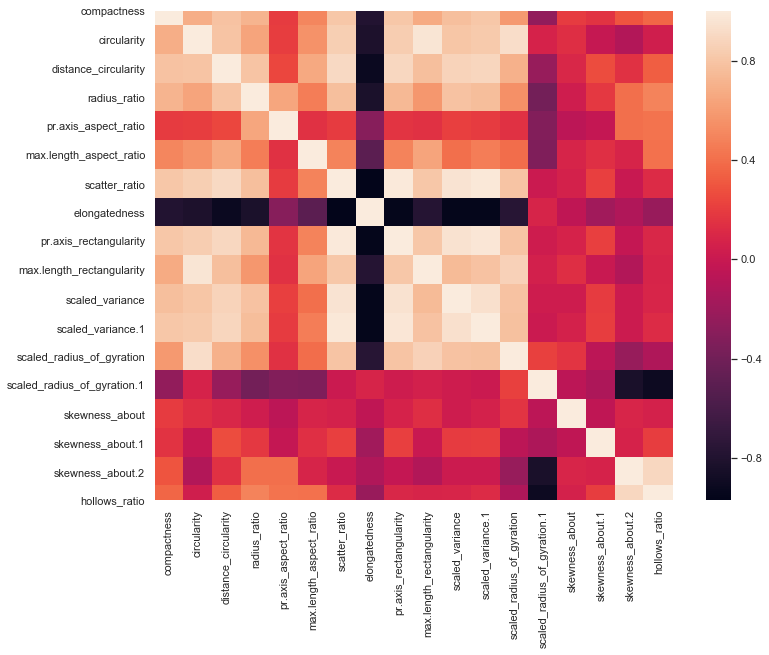

In [38]:
# Let's look at the heatmap

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

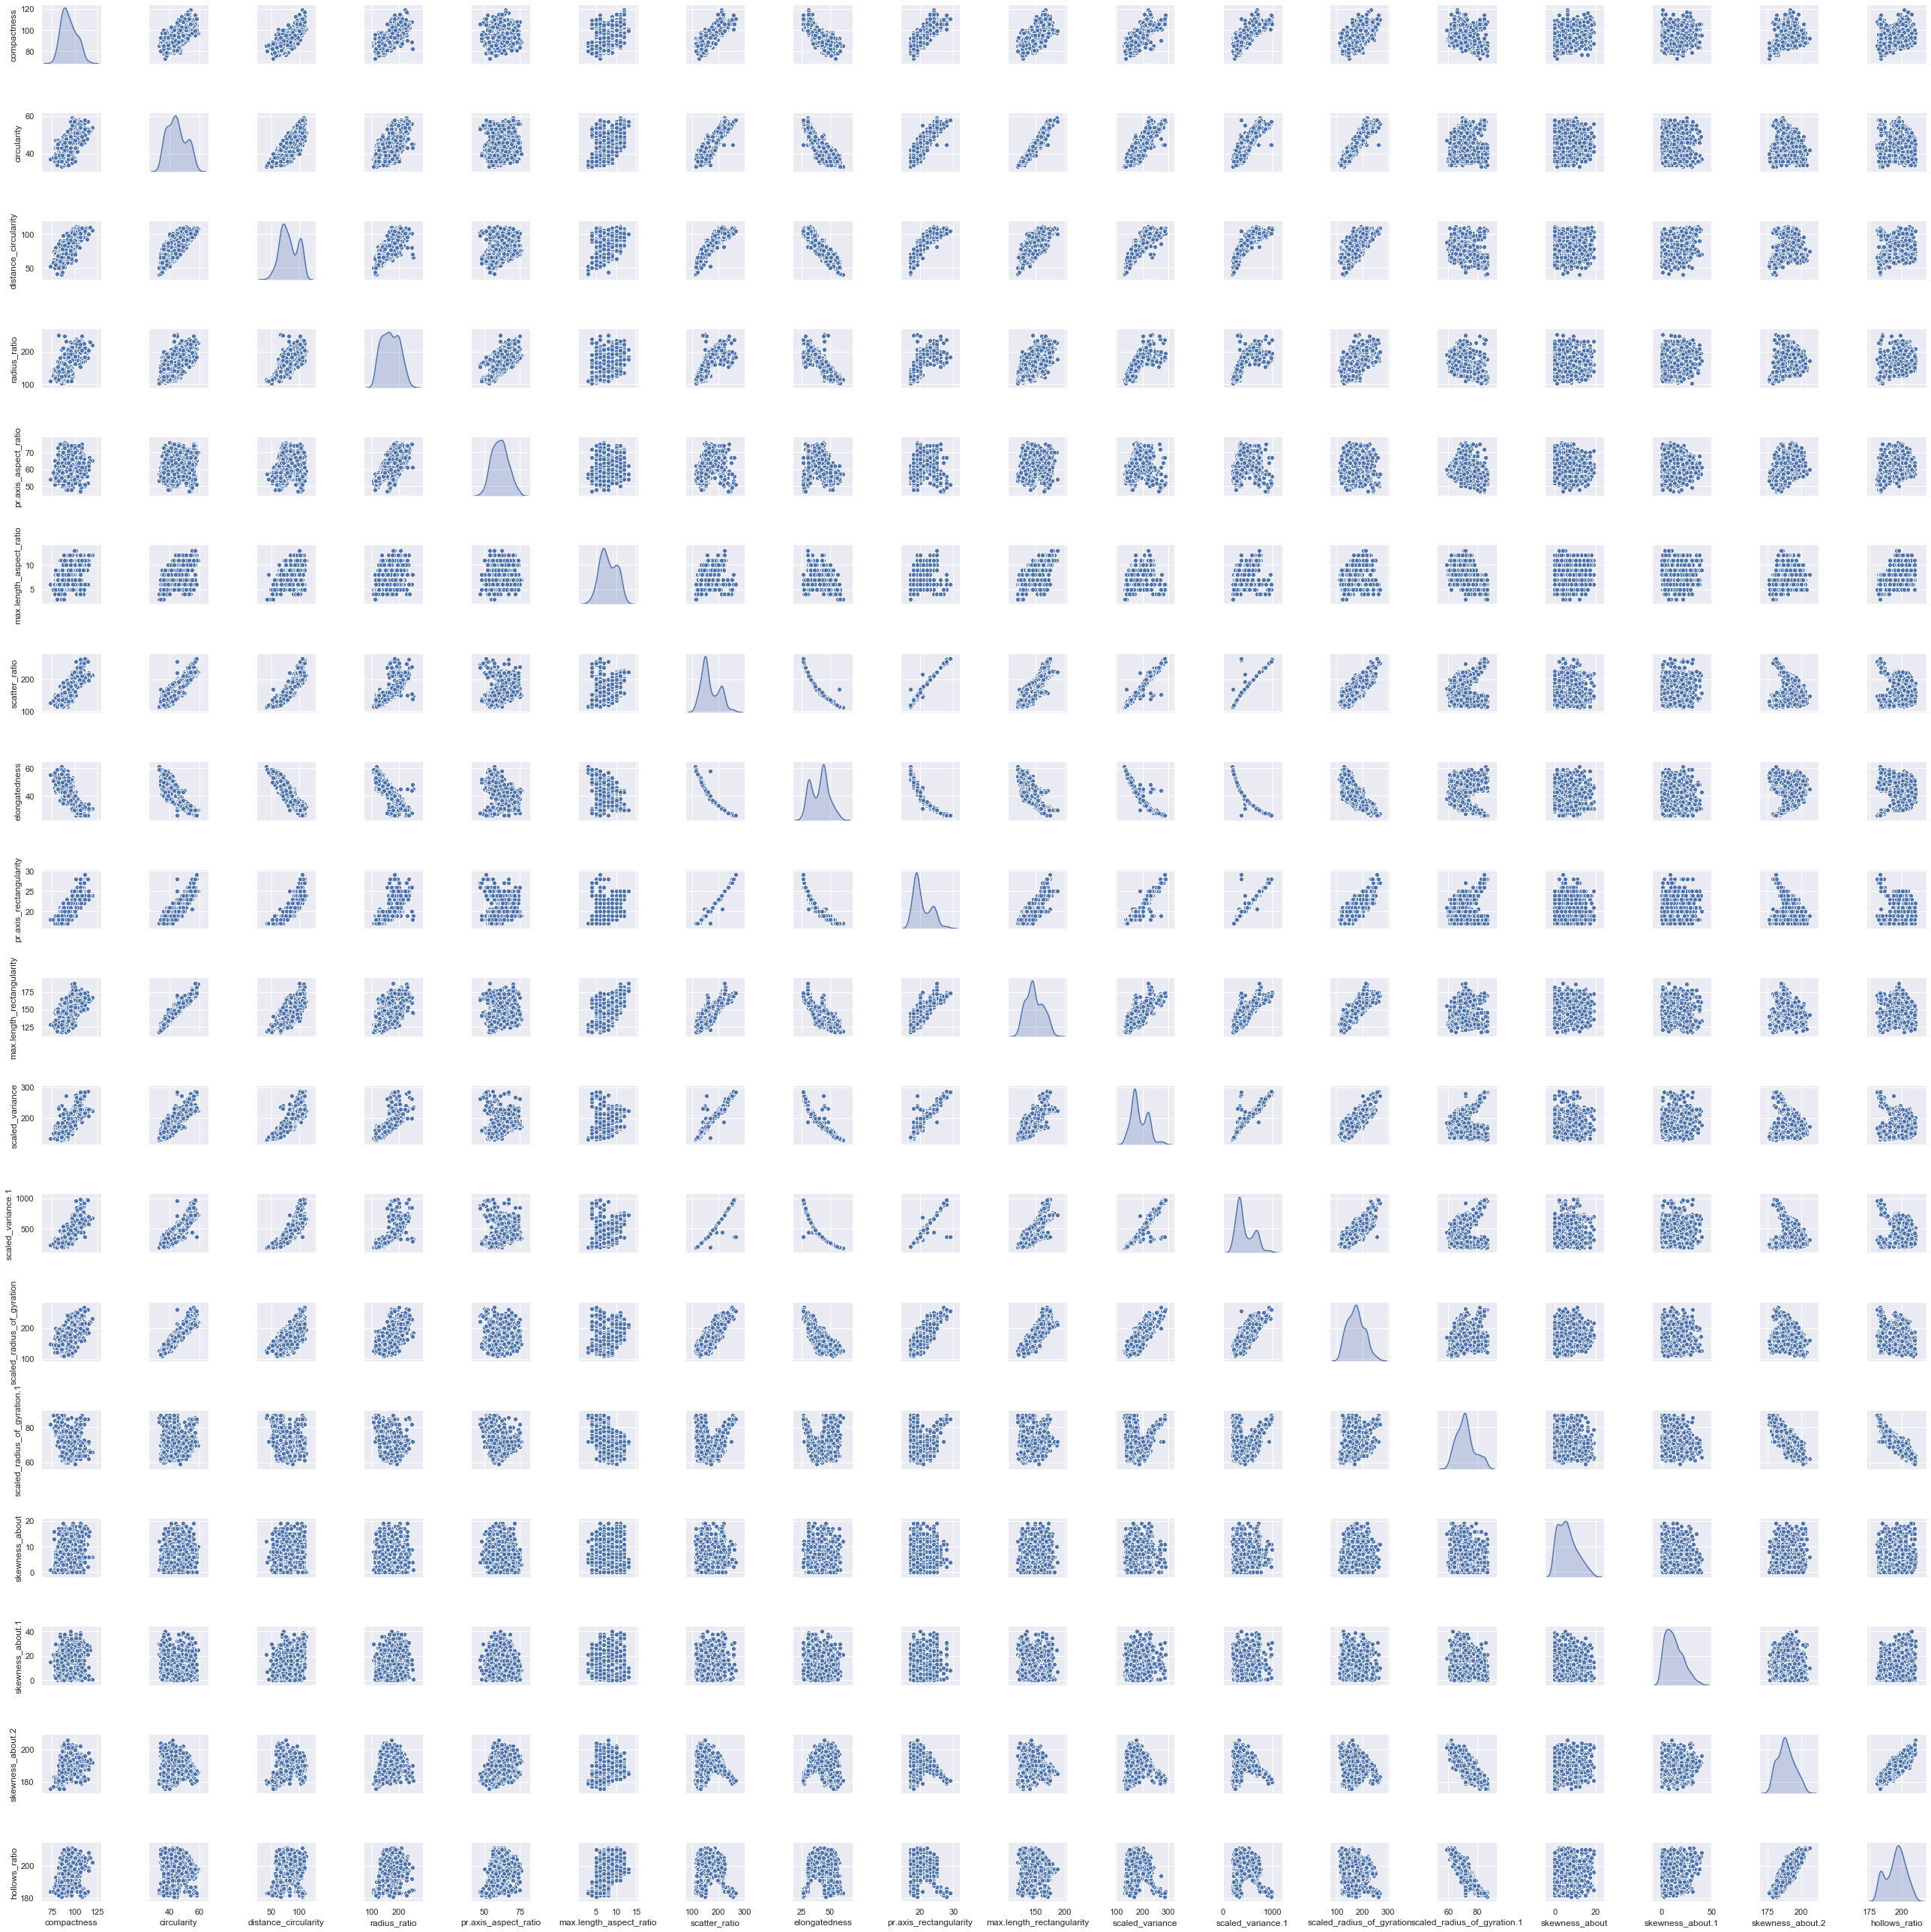

In [39]:
# Pair plot

sns.set()
sns.pairplot(df, size = 2.0, diag_kind="kde")
plt.show()

In [24]:
# There are several variables that are highly correlated with each other

#Create and view the correlation matrix
df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.721988,0.193100,0.499928,0.812235,-0.788643,0.813636,0.676143,0.770575,0.808092,0.585156,-0.248242,0.196883,0.156722,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.638393,0.202738,0.560067,0.848207,-0.821901,0.844972,0.961943,0.803291,0.830089,0.926888,0.069350,0.136594,-0.010078,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.794294,0.244306,0.666647,0.904400,-0.911435,0.893128,0.774669,0.870051,0.885282,0.705953,-0.230187,0.099014,0.262354,0.145563,0.332095
radius_ratio,0.721988,0.638393,0.794294,1.000000,0.650738,0.463999,0.769693,-0.825686,0.743994,0.579807,0.786985,0.762029,0.550987,-0.390628,0.035738,0.179702,0.405705,0.491694
pr.axis_aspect_ratio,0.193100,0.202738,0.244306,0.650738,1.000000,0.150277,0.194212,-0.298492,0.162831,0.147896,0.207884,0.197112,0.148793,-0.321697,-0.056127,-0.021289,0.400841,0.415725
max.length_aspect_ratio,0.499928,0.560067,0.666647,0.463999,0.150277,1.000000,0.490360,-0.504032,0.488316,0.642713,0.401572,0.464533,0.397329,-0.336639,0.081637,0.141861,0.083613,0.413174
scatter_ratio,0.812235,0.848207,0.904400,0.769693,0.194212,0.490360,1.000000,-0.970723,0.989370,0.808356,0.960513,0.981244,0.799266,0.010024,0.064098,0.212351,0.005167,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.825686,-0.298492,-0.504032,-0.970723,1.000000,-0.949077,-0.775519,-0.947980,-0.950135,-0.766029,0.079526,-0.046310,-0.184284,-0.114727,-0.216719
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.743994,0.162831,0.488316,0.989370,-0.949077,1.000000,0.811447,0.947676,0.974917,0.797068,0.026627,0.072310,0.213838,-0.018990,0.099191
max.length_rectangularity,0.676143,0.961943,0.774669,0.579807,0.147896,0.642713,0.808356,-0.775519,0.811447,1.000000,0.750446,0.791060,0.866425,0.053131,0.130585,0.004423,-0.104254,0.076770


In [43]:
# KMeans Clustering

from sklearn.cluster import KMeans
from sklearn import metrics

cluster_range = range( 2, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_scale)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(df_scale, labels, metric='euclidean'))


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,415.628563,0.366033
1,3,326.784403,0.285270
2,4,296.038246,0.232640
3,5,268.379369,0.235416
4,6,246.619193,0.214317
5,7,232.571217,0.209714
6,8,219.880118,0.198436
7,9,210.881646,0.187456


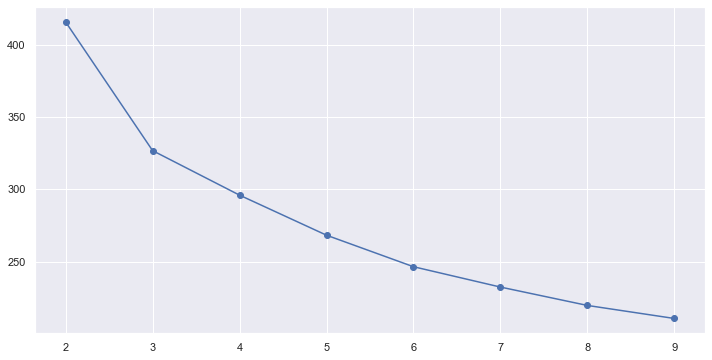

In [44]:
# Elbow plot 

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:

# The elbow plot shows that 3, or 4 might be a good choice for K 

In [46]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)